In [166]:
# Geo Pkgs
import geopandas as gpd 
import json
import geoplot
# Configure matplotlib.
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.colors as colors

In [25]:
# Analysis packages
import pandas as pd
import numpy as np
import pickle
import joblib
import sklearn
from sklearn.preprocessing import StandardScaler

In [26]:
NY = gpd.read_file("New York.geojson", driver='geoJSON')

In [27]:
NY.head()

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,0500000US36011,36,011,Cayuga,County,691.582,"POLYGON ((-76.49931 43.09795, -76.49194 43.004..."
1,0500000US36021,36,021,Columbia,County,634.705,"POLYGON ((-73.92963 42.07878, -73.91067 42.127..."
2,0500000US36023,36,023,Cortland,County,498.760,"POLYGON ((-76.25336 42.40757, -76.26558 42.623..."
3,0500000US36033,36,033,Franklin,County,1629.119,"POLYGON ((-73.90969 44.42970, -74.14142 44.407..."
4,0500000US36041,36,041,Hamilton,County,1717.373,"POLYGON ((-74.71261 43.28614, -74.86771 43.339..."


In [28]:
NY = NY.drop(['GEO_ID', 'STATE', 'COUNTY', 'LSAD'],axis=1)
NY.rename(columns = {'NAME':'County'}, inplace = True) 

In [35]:
NY.head()

,County,CENSUSAREA,geometry
0,Cayuga,691.582,"POLYGON ((-76.49931 43.09795, -76.49194 43.004..."
1,Columbia,634.705,"POLYGON ((-73.92963 42.07878, -73.91067 42.127..."
2,Cortland,498.760,"POLYGON ((-76.25336 42.40757, -76.26558 42.623..."
3,Franklin,1629.119,"POLYGON ((-73.90969 44.42970, -74.14142 44.407..."
4,Hamilton,1717.373,"POLYGON ((-74.71261 43.28614, -74.86771 43.339..."


In [99]:
NY_care = pd.read_csv('New York.csv')
NY_care.head()

,County,number of care home beds,predicted,demand,total population,senior Total,65-74 total,75-84 total,85+ total,disable population,number of households,median household income,hospital count,hospital beds,number of care home
0,Albany,1837,2482,645,307426,45881,24380,13849,7652,13303,126251,56090,5,1413,11
1,Allegany,361,465,104,47025,7951,4361,2532,1058,0,18208,41305,2,55,4
2,Bronx,11876,6303,-5573,1437872,157983,88267,47912,21804,67948,483449,34264,11,3417,45
3,Broome,1654,1706,52,194402,34199,17339,11048,5812,12788,82167,44457,3,742,11
4,Cattaraugus,552,521,-31,77686,13117,7254,4133,1730,4965,32263,42466,1,186,5


In [100]:
NY_merged = NY.set_index('County').join(NY_care.set_index('County'))

In [101]:
pd.set_option('display.max_rows', None)
print(NY_merged)

              CENSUSAREA                                           geometry  \
County                                                                        
Cayuga           691.582  POLYGON ((-76.49931 43.09795, -76.49194 43.004...   
Columbia         634.705  POLYGON ((-73.92963 42.07878, -73.91067 42.127...   
Cortland         498.760  POLYGON ((-76.25336 42.40757, -76.26558 42.623...   
Franklin        1629.119  POLYGON ((-73.90969 44.42970, -74.14142 44.407...   
Hamilton        1717.373  POLYGON ((-74.71261 43.28614, -74.86771 43.339...   
Lewis           1274.679  POLYGON ((-75.11016 43.61523, -75.53350 43.419...   
Montgomery       403.043  POLYGON ((-74.48884 42.98512, -74.28930 42.984...   
Oneida          1212.429  POLYGON ((-75.24796 42.87160, -75.43717 42.863...   
Orleans          391.259  POLYGON ((-77.99567 43.28745, -77.99572 43.284...   
Putnam           230.312  POLYGON ((-73.98149 41.43890, -73.93377 41.488...   
Rockland         173.550  POLYGON ((-73.94796 41.223

In [103]:
NY_merged.head(5)

,CENSUSAREA,geometry,number of care home beds,predicted,demand,total population,senior Total,65-74 total,75-84 total,85+ total,disable population,number of households,median household income,hospital count,hospital beds,number of care home
County,,,,,,,,,,,,,,,,
Cayuga,691.582,"POLYGON ((-76.49931 43.09795, -76.49194 43.004...",509,491,-18,77868,13205,7180,3905,2120,4706,31445,48415,1,99,4
Columbia,634.705,"POLYGON ((-73.92963 42.07878, -73.91067 42.127...",596,456,-140,60919,12644,7246,3755,1643,0,25906,55546,1,192,4
Cortland,498.760,"POLYGON ((-76.25336 42.40757, -76.26558 42.623...",400,380,-20,48123,7095,4016,2107,972,0,18671,45338,1,162,3
Franklin,1629.119,"POLYGON ((-73.90969 44.42970, -74.14142 44.407...",195,199,4,50692,7467,4282,2299,886,0,19054,42050,2,171,2
Hamilton,1717.373,"POLYGON ((-74.71261 43.28614, -74.86771 43.339...",0,1,1,4575,1232,742,347,143,0,2262,49557,0,0,0


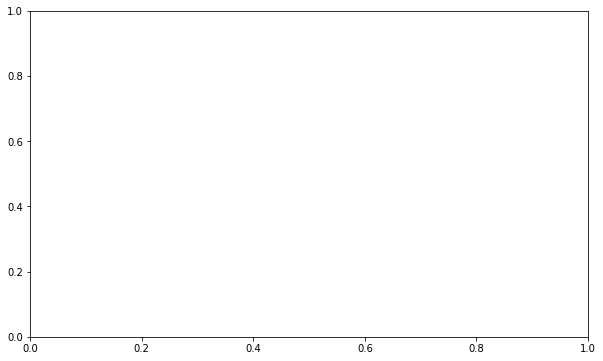

In [173]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'hospital beds'
# set the range for the choropleth
vmin, vmax = 0, 800
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

Text(0.15, 0.25, 'Tool: Age Wise')

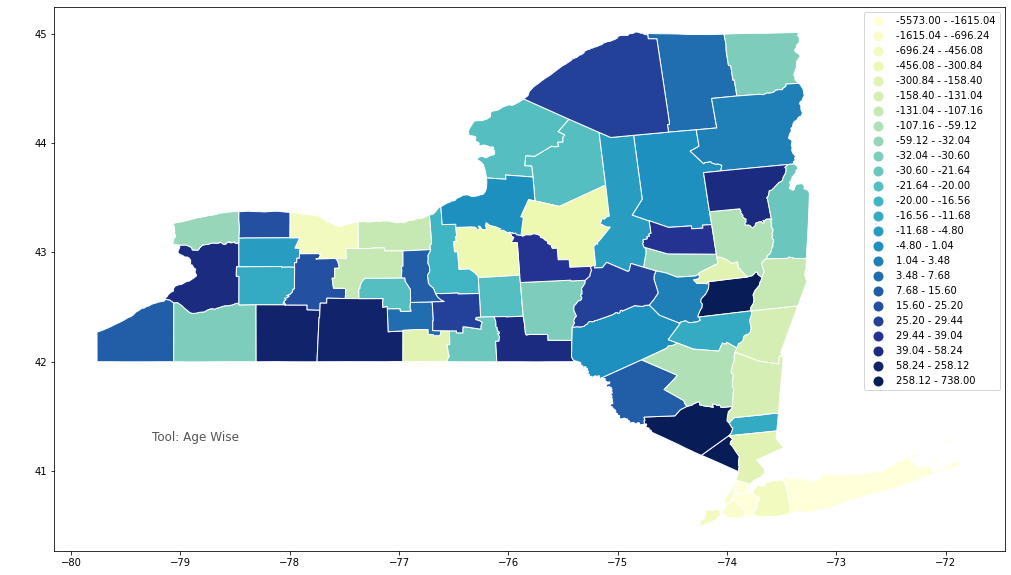

In [307]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'demand'
## plot
ax = NY_merged.plot(column=variable, cmap = 'YlGnBu' , figsize=(20,10), scheme='quantiles',edgecolor='1', k=25, legend = True)
ax.annotate('Tool: Age Wise',xy=(0.15, 0.25),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')


# Create colorbar as a legend
#sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
#sm._A = []
# add the colorbar to the figure
#cbar = fig.colorbar(sm)

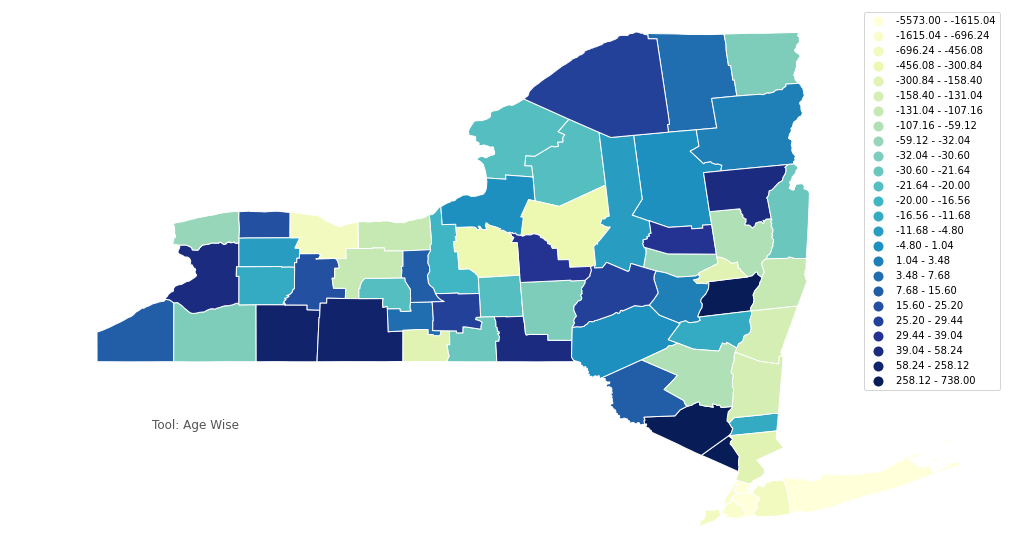

In [308]:
#add title to the map
#ax.set_title('Estimated Local Care Home Needs', fontdict = {'fontsize':30,'fontweight':'3'})
#remove axes
ax.set_axis_off()
#move legend to an empty space
ax.get_figure()

In [182]:
WA = gpd.read_file("Washington.geojson", driver='geoJSON')

In [183]:
WA.head()

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,0500000US53035,53,035,Kitsap,County,394.941,"POLYGON ((-122.80145 47.40402, -122.80015 47.5..."
1,0500000US53045,53,045,Mason,County,959.417,"POLYGON ((-122.90566 47.15561, -122.91262 47.1..."
2,0500000US53059,53,059,Skamania,County,1655.677,"POLYGON ((-121.82005 45.70465, -121.86717 45.6..."
3,0500000US53069,53,069,Wahkiakum,County,263.375,"POLYGON ((-123.36364 46.14632, -123.37143 46.1..."
4,0500000US53013,53,013,Columbia,County,868.629,"POLYGON ((-118.22893 46.59361, -118.22447 46.5..."


In [184]:
WA = WA.drop(['GEO_ID', 'STATE', 'COUNTY', 'LSAD'],axis=1)
WA.rename(columns = {'NAME':'County'}, inplace = True) 

In [185]:
WA.head()

,County,CENSUSAREA,geometry
0,Kitsap,394.941,"POLYGON ((-122.80145 47.40402, -122.80015 47.5..."
1,Mason,959.417,"POLYGON ((-122.90566 47.15561, -122.91262 47.1..."
2,Skamania,1655.677,"POLYGON ((-121.82005 45.70465, -121.86717 45.6..."
3,Wahkiakum,263.375,"POLYGON ((-123.36364 46.14632, -123.37143 46.1..."
4,Columbia,868.629,"POLYGON ((-118.22893 46.59361, -118.22447 46.5..."


In [186]:
WA_care = pd.read_csv('Washington.csv')
WA_care.head()

,County,Care home beds,predicted,demand,total population,senior Total,65-74 total,75-84 total,85+ total,disable population,number of households,median household income,hospital count,hospital beds,number of care home
0,Adams,39,59,20,20150,1969,1237,550,182,2599,17484,49266,2,50,1
1,Asotin,90,69,-21,22520,5901,3423,1725,753,2905,24243,58265,1,25,1
2,Benton,364,650,286,201800,32143,19636,9031,3476,28050,223298,65888,4,463,4
3,Chelan,240,262,22,78420,16925,9983,4857,2085,10665,97634,69251,4,268,3
4,Clallam,303,351,48,76010,23025,13176,6858,2991,16038,90313,48396,2,151,4


In [187]:
WA_merged = WA.set_index('County').join(WA_care.set_index('County'))

In [188]:
pd.set_option('display.max_rows', None)
print(WA_merged)

              CENSUSAREA                                           geometry  \
County                                                                        
Kitsap           394.941  POLYGON ((-122.80145 47.40402, -122.80015 47.5...   
Mason            959.417  POLYGON ((-122.90566 47.15561, -122.91262 47.1...   
Skamania        1655.677  POLYGON ((-121.82005 45.70465, -121.86717 45.6...   
Wahkiakum        263.375  POLYGON ((-123.36364 46.14632, -123.37143 46.1...   
Columbia         868.629  POLYGON ((-118.22893 46.59361, -118.22447 46.5...   
Garfield         710.686  POLYGON ((-117.60316 45.99889, -117.60360 46.1...   
Stevens         2477.765  POLYGON ((-117.42951 49.00036, -117.43020 48.9...   
Thurston         721.961  POLYGON ((-122.37298 46.84504, -122.35781 46.8...   
Walla Walla     1270.129  POLYGON ((-118.22893 46.59361, -118.22841 46.5...   
Whatcom         2106.857  MULTIPOLYGON (((-122.69591 48.73727, -122.6689...   
Whitman         2159.090  POLYGON ((-118.20981 46.73

In [189]:
WA_merged.head(5)

,CENSUSAREA,geometry,Care home beds,predicted,demand,total population,senior Total,65-74 total,75-84 total,85+ total,disable population,number of households,median household income,hospital count,hospital beds,number of care home
County,,,,,,,,,,,,,,,,
Kitsap,394.941,"POLYGON ((-122.80145 47.40402, -122.80015 47.5...",1102,1379,277,270100,58322,34528,16769,7024,41325,266427,76753,2,285,9
Mason,959.417,"POLYGON ((-122.90566 47.15561, -122.91262 47.1...",211,185,-26,64980,15781,9425,4521,1836,8382,72427,62197,1,25,2
Skamania,1655.677,"POLYGON ((-121.82005 45.70465, -121.86717 45.6...",0,0,0,12060,2712,1717,701,294,1556,13396,60905,0,0,0
Wahkiakum,263.375,"POLYGON ((-123.36364 46.14632, -123.37143 46.1...",0,0,0,4190,1503,871,443,189,541,4713,50824,0,0,0
Columbia,868.629,"POLYGON ((-118.22893 46.59361, -118.22447 46.5...",23,45,22,4160,1293,765,381,147,537,5724,46339,1,25,1


Text(0.8, 0.15, 'Tool: Age Wise')

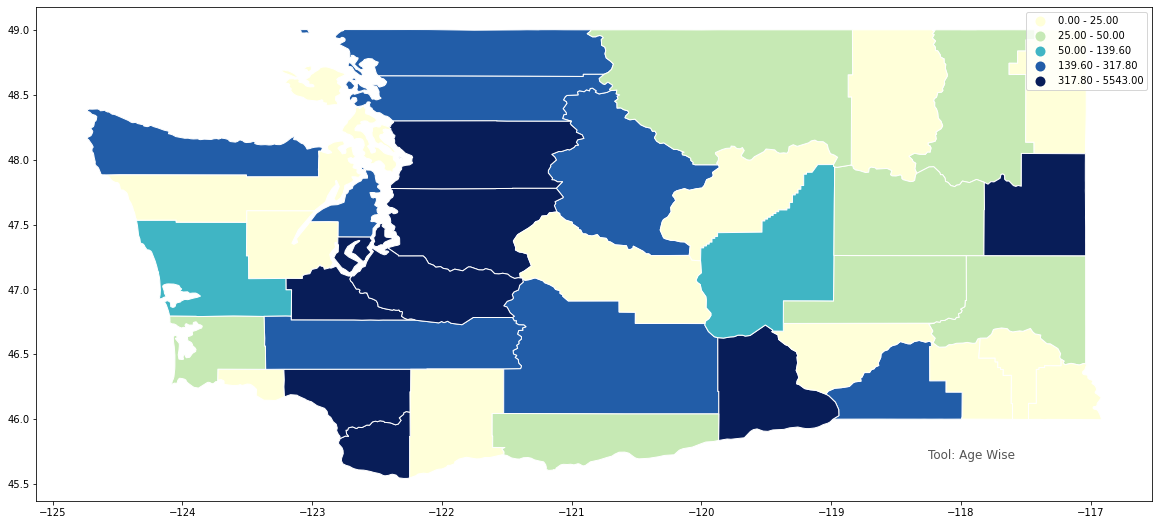

In [299]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'hospital beds'
## plot
ay = WA_merged.plot(column=variable, cmap = 'YlGnBu' , figsize=(20,10), scheme='quantiles',edgecolor='1', k=5, legend = True)
ay.annotate('Tool: Age Wise',xy=(0.8, 0.15),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')


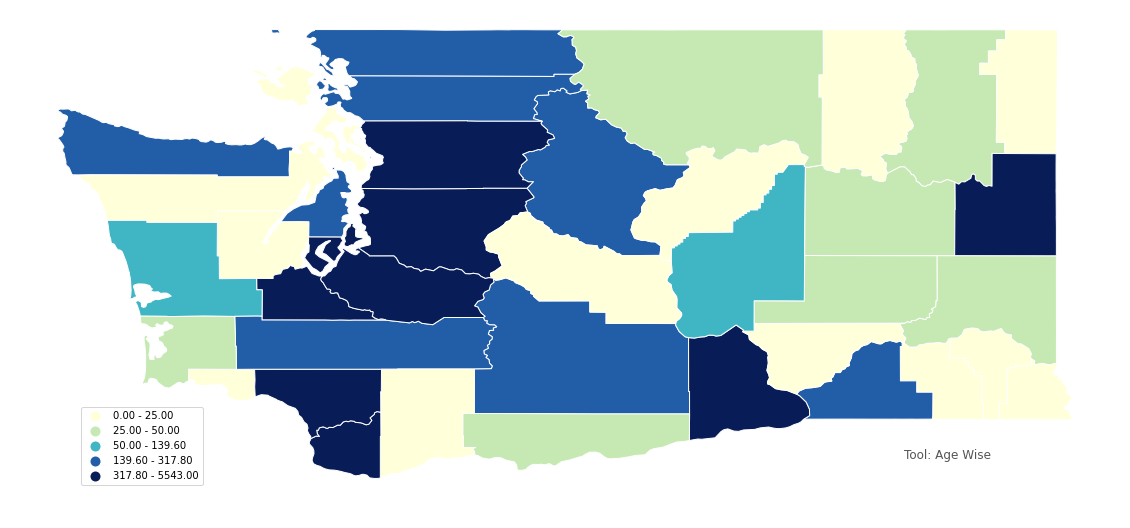

In [300]:
#add title to the map
#ay.set_title('Estimated Local Care Home Needs', fontdict = {'fontsize':30,'fontweight':'3'})
#remove axes
ay.set_axis_off()
#move legend to an empty space
ay.get_legend().set_bbox_to_anchor((.18,.2))
ay.get_figure()